In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
import matplotlib as mpl

In [2]:
plt.rcParams["figure.figsize"] = (4,3)
colormap = plt.get_cmap('cool')

In [3]:
%matplotlib notebook

In [4]:
def pendulum(x1, x2, v1, v2, parameters):
    k1, k2, m1, m2 = parameters
    return (v1, v2, -k1/m1*x1 + k2/m1*(x2 - x1), -k1/m2*x2 + k2/m2*(x1 - x2))

In [5]:
def runge_kutta4(function, iterations, initial, step, parameters):
    x1_val = [initial[0]]
    x2_val = [initial[1]]
    x3_val = [initial[2]]
    x4_val = [initial[3]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x11, x21, x31, x41 = function(x1_val[-1], x2_val[-1], x3_val[-1], x4_val[-1], parameters)
        x12, x22, x32, x42 = function(x1_val[-1]+step*x11/2, x2_val[-1]+step*x21/2, x3_val[-1]+step*x31/2, x4_val[-1]+step*x41/2, parameters)
        x13, x23, x33, x43 = function(x1_val[-1]+step*x12/2, x2_val[-1]+step*x22/2, x3_val[-1]+step*x32/2, x4_val[-1]+step*x42/2, parameters)
        x14, x24, x34, x44 = function(x1_val[-1]+step*x13, x2_val[-1]+step*x23, x3_val[-1]+step*x33, x4_val[-1]+step*x43, parameters)
        
        x1_val.append(x1_val[-1]+step*(x11+2*x12+2*x13+x14)/6)
        x2_val.append(x2_val[-1]+step*(x21+2*x22+2*x23+x24)/6)
        x3_val.append(x3_val[-1]+step*(x31+2*x32+2*x33+x34)/6)
        x4_val.append(x4_val[-1]+step*(x41+2*x42+2*x43+x44)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x1_val, x2_val, x3_val, x4_val

In [6]:
iterations = 50
initial = (1, 2, 0, 0)
step = 0.01
parameters = (0.5, 0.5, 1, 1)
t_val, x1_val, x2_val, x3_val, x4_val = runge_kutta4(pendulum, iterations, initial, step, parameters)

<IPython.core.display.Javascript object>


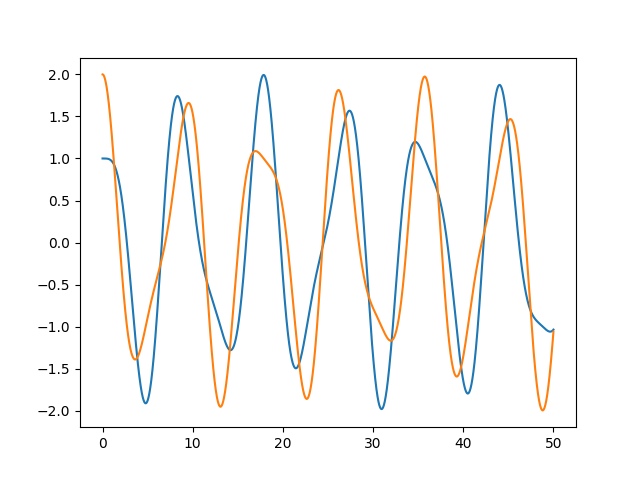

In [7]:
plt.plot(t_val, x1_val)
plt.plot(t_val, x2_val)

In [8]:
def runge_kutta_vector(function, iterations, initial, step, parameters):
    values = [initial]
    t_val = [0]
    for i in range(round(iterations/step)):
        values1 = np.array(function(values[-1], parameters))
        values2 = np.array(function(values[-1] + step*values1/2, parameters))
        values3 = np.array(function(values[-1] + step*values2/2, parameters))
        values4 = np.array(function(values[-1] + step*values3, parameters))
        
        values.append(values[-1] + step*(values1 + 2*values2 + 2*values3 + values4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, np.array(values)

In [9]:
def pendulum_vector(values, parameters):
    x1, x2, v1, v2 = values
    k1, k2, m1, m2 = parameters
    return (v1, v2, -k1/m1*x1 + k2/m1*(x2 - x1), -k2/m2*x2 + k1/m2*(x1 - x2))

In [13]:
iterations = 1000
initial = (1, 1, 0, 0)
step = 0.01
parameters = (0.5, 0.5, 1, 1)
t_val, values = runge_kutta_vector(pendulum_vector, iterations, initial, step, parameters)
x1, x2, v1, v2 = values[:, 0], values[:, 1], values[:, 2], values[:, 3]

In [14]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


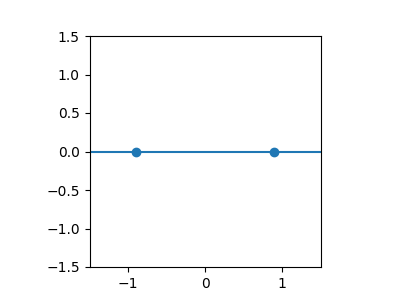

In [30]:
# create a figure with an axes
fig, ax = plt.subplots()
# set the axes limits
ax.axis([-1.5,1.5,-1.5,1.5])
# set equal aspect such that the circle is not shown as ellipse
ax.set_aspect("equal")
# create a point in the axes
point, = ax.plot([], [], marker="o")

def update(t):
    x = [-2, -x1[t], x2[t], 2]
    # set point's coordinates
    point.set_data(x, [0, 0, 0, 0])
    return point,

ani = FuncAnimation(fig, update, interval=1, blit=True, repeat=True,
                    frames=range(len(t_val)))

plt.show()

In [10]:
def mult_pendulum_vector(values, parameters):
    n = len(values)//2
    x = values[:n]
    v = values[n:]
    k = parameters[:n]
    m = parameters[n:]
    res = v
    res = np.append(res, -k[0]/m[0]*x[0] + k[1]/m[0]*(x[1] - x[0]))
    
    for i in range(1, n - 1):
        res = np.append(res, k[i]/m[i]*(x[i - 1] - x[i]) + k[i + 1]/m[i]*(x[i + 1] - x[i]))
        
    res = np.append(res, -k[-1]/m[-1]*x[-1] + k[-2]/m[-2]*(x[-2] - x[-1]))
    return res

In [11]:
iterations = 1000
initial = [1, 0, 0, 0, 0, 0, 0, 0]
step = 0.01
parameters = (1, 1, 2, 1, 1, 1, 1, 1)

In [12]:
n = len(initial)//2
t_val, values = runge_kutta_vector(mult_pendulum_vector, iterations, initial, step, parameters)

<IPython.core.display.Javascript object>


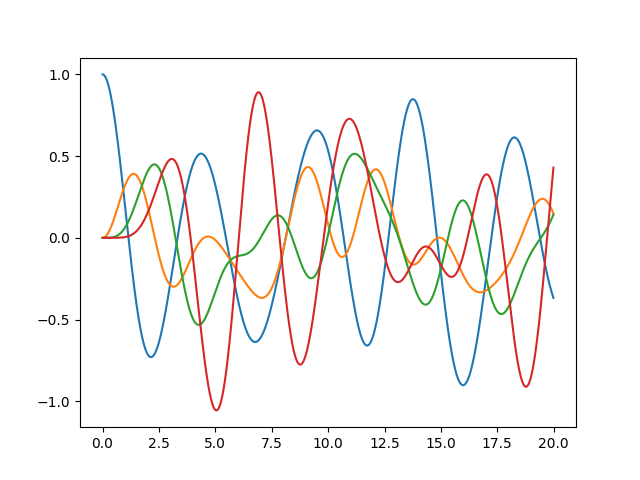

In [18]:
points = 2000
x1, x2, x3, x4 = values[:points, 0], values[:points, 1], values[:points, 2], values[:points, 3]
plt.plot(t_val[:points], x1)
plt.plot(t_val[:points], x2)
plt.plot(t_val[:points], x3)
plt.plot(t_val[:points], x4)

<IPython.core.display.Javascript object>


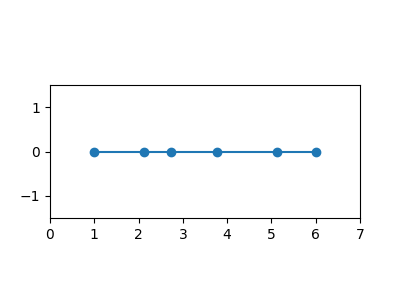

In [38]:
# create a figure with an axes
fig, ax = plt.subplots()
# set the axes limits
ax.axis([0,n+3,-1.5,1.5])
# set equal aspect such that the circle is not shown as ellipse
ax.set_aspect("equal")
# create a point in the axes
x_coords = np.array(range(1, n + 3))
y_coords = [0]*(n+2)

point, = ax.plot([], [], marker="o")

def update(t):
    x = x_coords + np.append(np.insert(values[t][:n], 0, 0), 0)
    # set point's coordinates
    point.set_data(x, y_coords)
    return point,

ani = FuncAnimation(fig, update, interval=1, blit=True, repeat=True,
                    frames=range(len(t_val)))
plt.show()